<a href="https://colab.research.google.com/github/sravanthivalluru06/OIB-SIP/blob/main/Project_5_Level_2%20Autocomplete%20and%20Autocorrect%20Data%20Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

LOAD THE DATASET

In [2]:
credit_card_data = pd.read_csv(r"/content/creditcard.csv")

credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


SIMULATED TEXT DATA

In [3]:
# Generate a small sample of text data (simulating user input)
text_data = [
    "Fraud detection is critical in financial transactions.",
    "The cardholder is responsible for the transactions.",
    "Detecting fraudulent activities can save millions.",
    "Credit card fraud can occur in various forms.",
    "Always report suspicious transactions immediately."
]

NLP PREPROCESSING

In [4]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

# Preprocess text data
cleaned_text_data = [preprocess_text(text) for text in text_data]

AUTOCOMPLETE AND AUTOCORRECT FUNCTIONALITIES

AUTOCOMPLETE IMPLEMENTATION

In [5]:
def autocomplete(input_text, text_data, n=3):
    # Tokenize and create a list of words
    words = ' '.join(text_data).split()
    word_count = Counter(words)

 # Find suggestions
    suggestions = [word for word in word_count if word.startswith(input_text)]
    return suggestions[:n]

AUTOCORRECT IMPLEMENTATION

In [6]:
def autocorrect(input_word, dictionary):
    def levenshtein(s1, s2):
        if len(s1) < len(s2):
            return levenshtein(s2, s1)
        if len(s2) == 0:
            return len(s1)
        s1, s2 = list(s1), list(s2)
        previous_row = range(len(s2) + 1)
        for i, c1 in enumerate(s1):
            current_row = [i + 1]
            for j, c2 in enumerate(s2):
                insertions = previous_row[j + 1] + 1
                deletions = current_row[j] + 1
                substitutions = previous_row[j] + (c1 != c2)
                current_row.append(min(insertions, deletions, substitutions))
            previous_row = current_row
        return previous_row[-1]

    closest_word = min(dictionary, key=lambda word: levenshtein(input_word, word))
    return closest_word

In [7]:
def define_metrics(true_labels, predicted_labels):
    pass

In [8]:
def assess_user_experience(feedback):
    pass

In [9]:
# Example Usage
# Test autocomplete
print("Autocomplete Suggestions for 'fr':", autocomplete('fr', cleaned_text_data))

# Test autocorrect
sample_dictionary = ['fraud', 'detection', 'is', 'critical', 'in', 'financial', 'transactions']
print("Autocorrect for 'frad':", autocorrect('frad', sample_dictionary))

Autocomplete Suggestions for 'fr': ['fraud', 'fraudulent']
Autocorrect for 'frad': fraud


DATA VISUALIZATION

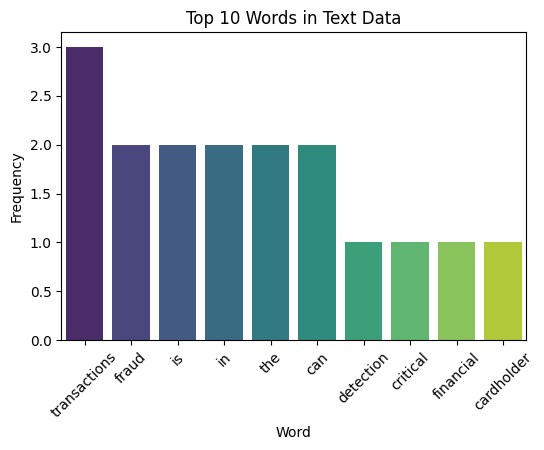

In [10]:
###Visualize Word Frequencies
def visualize_word_frequencies(text_data):
    words = ' '.join(text_data).split()
    word_count = Counter(words)

    # Create a DataFrame from the Counter
    word_df = pd.DataFrame(word_count.most_common(10), columns=['Word', 'Frequency'])

    plt.figure(figsize=(6, 4))
    sns.barplot(data=word_df, x='Word', y='Frequency', palette='viridis')
    plt.title('Top 10 Words in Text Data')
    plt.xticks(rotation=45)
    plt.show()

# Visualize word frequencies
visualize_word_frequencies(cleaned_text_data)